In [1]:
from bib import *
import numpy as np
import pandas as pd

In [2]:
xtrains,ytrains,xvals,yvals,xtest,ytest=split(('CHL 1','THERM 1','SSH','SR','WS'),
                                               ['CHL '+ str(i) for i in range(2,19)])
ytrains,yvals,ytest=applyToy(lambda x:np.log(x)/np.log(10),ytrains,yvals,ytest)

In [3]:
def validate(model,xtrains,ytrains,xvals,yvals):
    fold_evaluation=[]
    for xt,yt,xv,yv in zip(xtrains,ytrains,xvals,yvals):
        model.fit(xt.values,yt.values)
        yp = model.predict(xv.values)
        fold_evaluation.append(evaluate(yp,yv))
    return np.mean(fold_evaluation),np.std(fold_evaluation)


In [4]:
from sklearn.neural_network import MLPRegressor
print(' Trainin results for 100 30 : error %.4f +- %.4f'% \
      validate(MLPRegressor(hidden_layer_sizes=(100,30 ),),xtrains,ytrains,xvals,yvals))

 Trainin results for 100 30 : error 0.0248 +- 0.0075


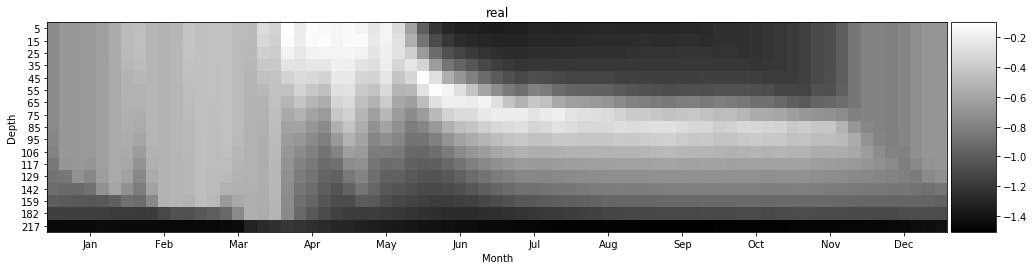

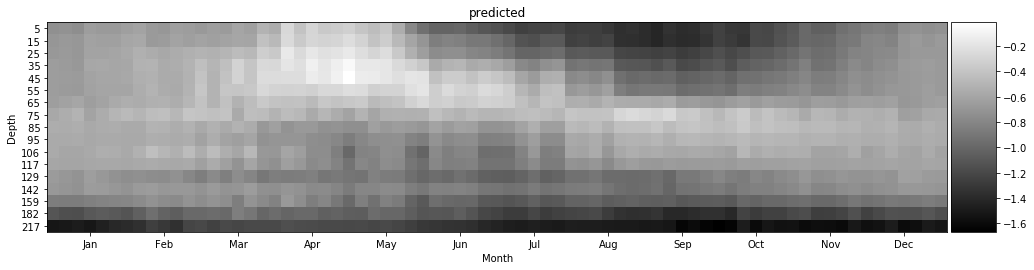

In [5]:
model =MLPRegressor(hidden_layer_sizes=(100,30 ))
model.fit(xtrains[0].values, ytrains[0].values)
yp=model.predict(xtest)
plotYear(ytest,title='real')
plotYear(yp,title='predicted')